In [1]:
#!pip install imutils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
train_folder= '/content/drive/MyDrive/datacovid/train/'
val_folder  = '/content/drive/MyDrive/datacovid/val/'
test_folder = '/content/drive/MyDrive/datacovid/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1341
normal picture title:  NORMAL2-IM-0927-0001.jpeg
pneumonia picture title: person839_bacteria_2757.jpeg


Text(0.5, 1.0, 'Pneumonia')

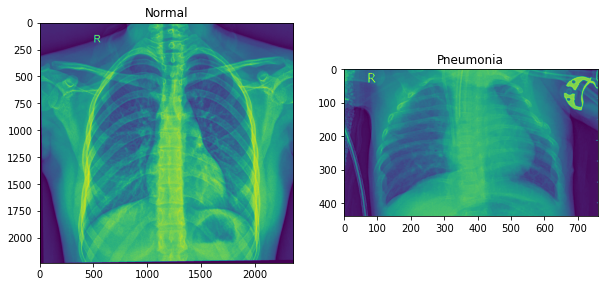

In [7]:
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [8]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu"))

cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [11]:
cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 5216/32,
                         epochs = 15,
                         validation_data = validation_generator,    
                         validation_steps = 624/32)

Epoch 1/15
163/163 [==============================] - 1322s 8s/step - loss: 0.4717 - accuracy: 0.7784 - val_loss: 0.3738 - val_accuracy: 0.8125
Epoch 2/15
163/163 [==============================] - 56s 343ms/step - loss: 0.2287 - accuracy: 0.9049
Epoch 3/15
163/163 [==============================] - 55s 340ms/step - loss: 0.2219 - accuracy: 0.9009
Epoch 4/15
163/163 [==============================] - 55s 335ms/step - loss: 0.2138 - accuracy: 0.9127
Epoch 5/15
163/163 [==============================] - 55s 337ms/step - loss: 0.1837 - accuracy: 0.9267
Epoch 6/15
163/163 [==============================] - 55s 337ms/step - loss: 0.1571 - accuracy: 0.9349
Epoch 7/15
163/163 [==============================] - 55s 337ms/step - loss: 0.1671 - accuracy: 0.9370
Epoch 8/15
163/163 [==============================] - 55s 336ms/step - loss: 0.1566 - accuracy: 0.9381
Epoch 9/15
163/163 [==============================] - 54s 333ms/step - loss: 0.1483 - accuracy: 0.9449
Epoch 10/15
163/163 [===========

In [12]:
test_accu = cnn.evaluate(test_set,steps=624)

624/624 [==============================] - 144s 230ms/step - loss: 0.2705 - accuracy: 0.9135


In [13]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 91.34615659713745 %


In [14]:
Y_pred = cnn.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)

In [15]:
max(y_pred)

0

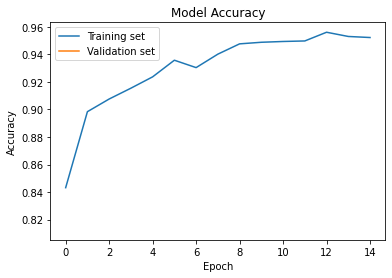

In [16]:
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

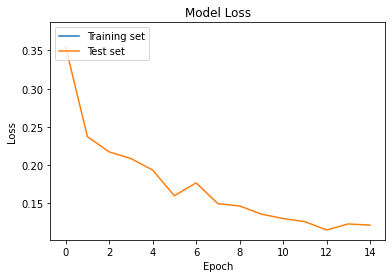

In [17]:
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [18]:
from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/3ov9jG4eqz9k3XXsU8/giphy.gif">')